In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import geopandas as gpd
import contextily as cx
import folium

In [23]:
df1 = pd.read_csv("Data/volcano_data_2010.csv")

# Keep only relevant columns
df = df1.loc[:, ("Year", "Name", "Country", "Latitude", "Longitude", "Type")]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       63 non-null     int64  
 1   Name       63 non-null     object 
 2   Country    63 non-null     object 
 3   Latitude   63 non-null     float64
 4   Longitude  63 non-null     float64
 5   Type       63 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.1+ KB


In [24]:
geometry = gpd.points_from_xy(df.Longitude, df.Latitude)
geo_df = gpd.GeoDataFrame(    df[["Year", "Name", "Country", "Latitude", "Longitude", "Type"]], geometry=geometry)

geo_df.head()

,Year,Name,Country,Latitude,Longitude,Type,geometry
0,2010,Tungurahua,Ecuador,-1.467,-78.442,Stratovolcano,POINT (-78.44200 -1.46700)
1,2010,Eyjafjallajokull,Iceland,63.630,-19.620,Stratovolcano,POINT (-19.62000 63.63000)
2,2010,Pacaya,Guatemala,14.381,-90.601,Complex volcano,POINT (-90.60100 14.38100)
3,2010,Sarigan,United States,16.708,145.780,Stratovolcano,POINT (145.78000 16.70800)
4,2010,Karangetang [Api Siau],Indonesia,2.780,125.480,Stratovolcano,POINT (125.48000 2.78000)


In [25]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
df.Type.unique()


array(['Stratovolcano', 'Complex volcano', 'Shield volcano',
       'Subglacial volcano', 'Lava dome', 'Caldera'], dtype=object)

Text(0.5, 1.0, 'Volcanoes')

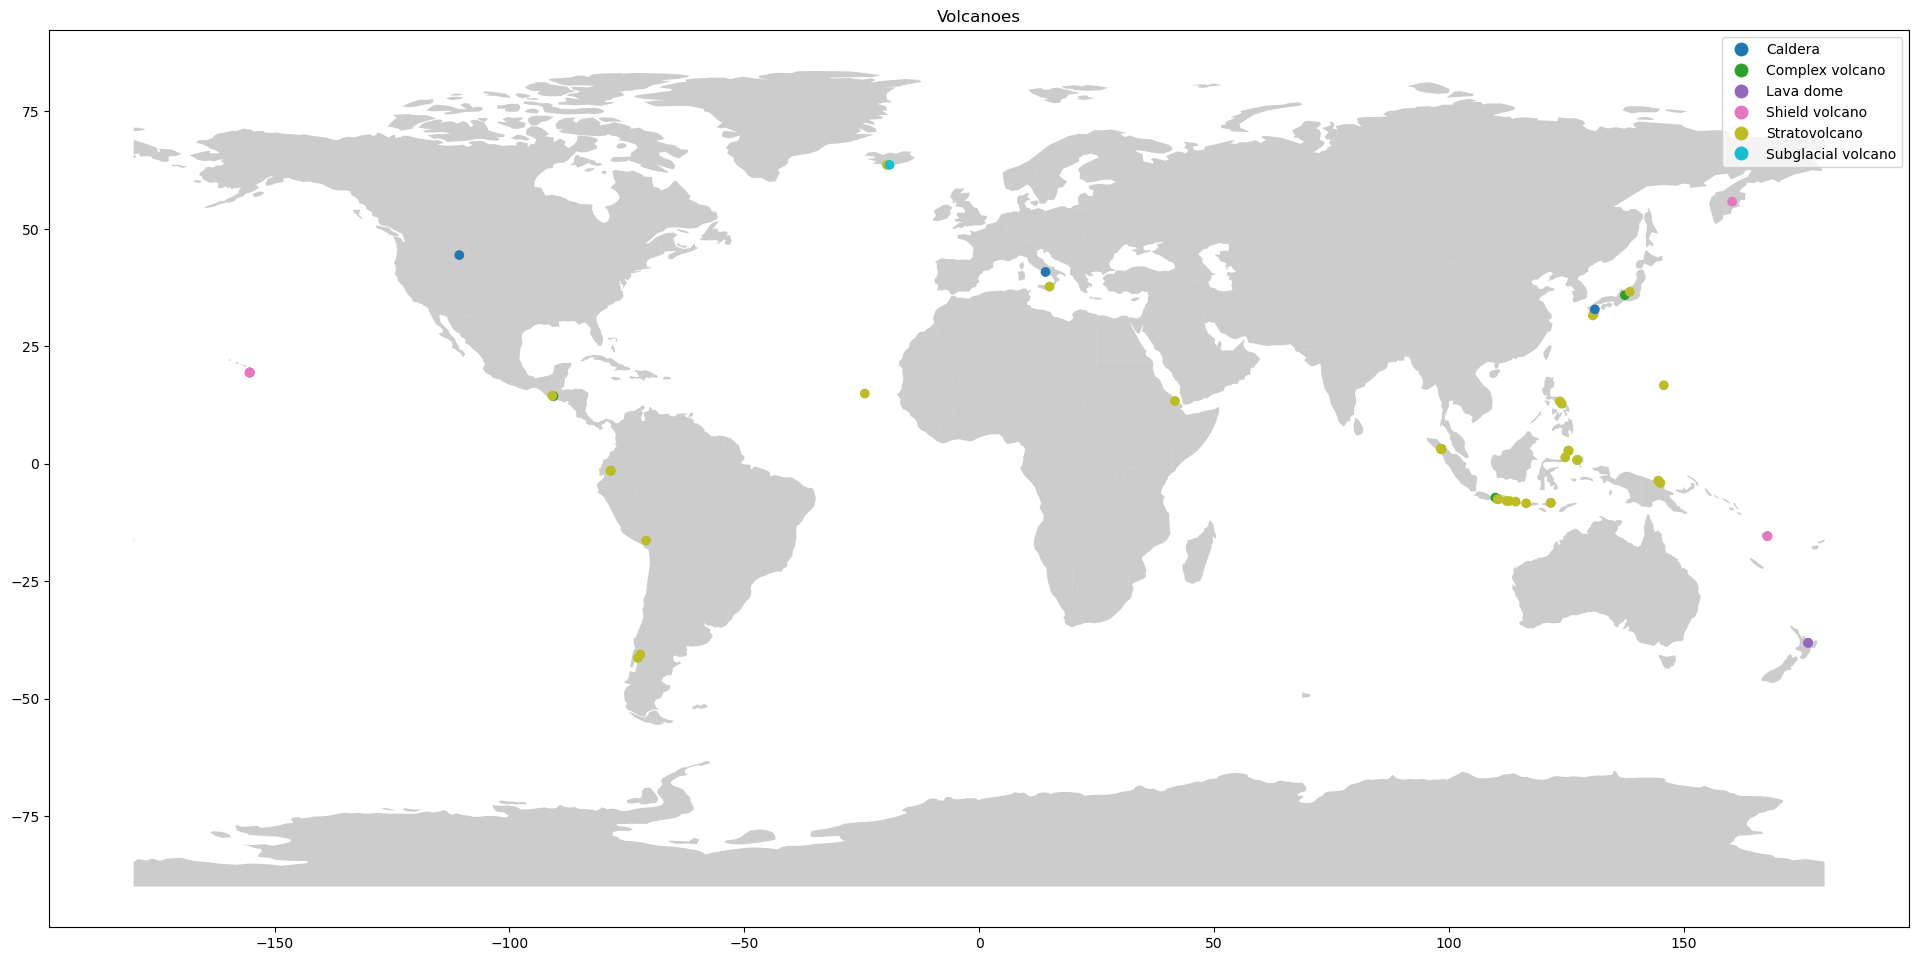

In [26]:
fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.4, color="grey")
geo_df.plot(column="Type", ax=ax, legend=True)
plt.title("Volcanoes")

In [6]:
map = folium.Map(location=[19.432, -99.133], tiles="OpenStreetMap", zoom_start=10,min_zoom = 10 , max_zoom=15)
map

In [19]:
path=('Data/centros-de-salud/Centros de Salud/Centros_de_salud.shp')

In [20]:
df_sk1 = gpd.read_file(path)

In [37]:
df_sk1.head(3)

,ID,NOM_ENT,C__ENTIDAD,N_MUNICI,C_MUNI,N_LOC,C_LOC,N_INSTITU,TOT_CONSU,NOM_UNIDAD,ESTATU_OPE,LONGITUD,LATITUD,tipo_centr,geometry
0,1,CIUDAD DE MEXICO,09,IZTAPALAPA,007,IZTAPALAPA,0001,SECRETARÍA DE SALUD,4,C.S.T-I HONORATO LEAL,EN OPERACIÓN,-99.0519,19.3511,T-I,POINT (-99.05190 19.35110)
1,2,CIUDAD DE MEXICO,09,IZTAPALAPA,007,IZTAPALAPA,0001,SECRETARÍA DE SALUD,5,C.S.T-II ERMITA ZARAGOZA,EN OPERACIÓN,-98.595985,19.214778,T-II,POINT (-99.01586 19.41464)
2,3,CIUDAD DE MEXICO,09,VENUSTIANO CARRANZA,017,VENUSTIANO CARRANZA,0001,SECRETARÍA DE SALUD,6,C.S.T-II JOSÉ MARÍA MORELOS Y PAVÓN,EN OPERACIÓN,-99.12099539999997,19.445398705606472,T-II,POINT (-99.12100 19.44540)


In [29]:
Out_Op=df_sk1[df_sk1['ESTATU_OPE']=='FUERA DE OPERACIÓN (TOTAL O PARCIAL)'].geometry
geo_df_list_menus=[[point.xy[1][0],point.xy[0][0]] for point in Out_Op]

In [25]:
df_sk1.columns

Index(['ID', 'NOM_ENT', 'C__ENTIDAD', 'N_MUNICI', 'C_MUNI', 'N_LOC', 'C_LOC',
       'N_INSTITU', 'TOT_CONSU', 'NOM_UNIDAD', 'ESTATU_OPE', 'LONGITUD',
       'LATITUD', 'tipo_centr', 'geometry'],
      dtype='object')

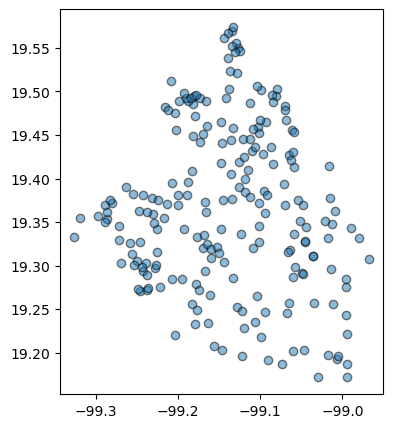

In [21]:
ax = df_sk1.plot(figsize=(5, 5), alpha=0.5, edgecolor='k')

In [44]:
#refrezcamos el mapa
map = folium.Map(location=[19.432, -99.133], tiles="OpenStreetMap", zoom_start=10)

# Se crea una lista con los puntos coordenadas

geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in df_sk1.geometry]

#se itera en el conjunto de puntos
for coordinates in geo_df_list:
    
    if coordinates in geo_df_list_menus:
         folium.CircleMarker(
        location=coordinates,
        radius=2.5,
        popup="Laurelhurst Park",
        color="#E7625F",
        fill=True,
        fill_color="#E7625F",).add_to(map)
    else:    
    
        folium.CircleMarker(
        location=coordinates,
        radius=5,
        popup="Laurelhurst Park",
        color="#3186cc",
        fill=True,
        fill_color="#3186cc",).add_to(map)
map

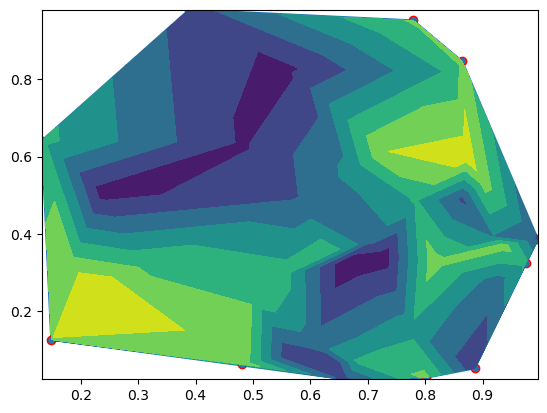

In [10]:
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import numpy as np

points = np.random.rand(40, 2)
weights = np.random.rand(40)

tri = Delaunay(points)

plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.scatter(points[:,0], points[:,1], marker='o', edgecolors='red')
plt.tricontourf(points[:,0], points[:,1], tri.simplices.copy(), weights)
plt.show()

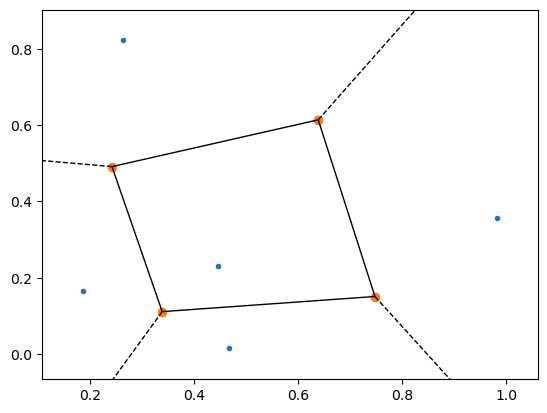

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from scipy.spatial import voronoi_plot_2d

# generate random points with weight
points = np.random.rand(5, 2)
weights = np.random.rand(5)

# calculate weighted voronoi tessellation
vor = Voronoi(points, qhull_options='Qbb Qc Qz')

# plot
fig = voronoi_plot_2d(vor)
plt.show()

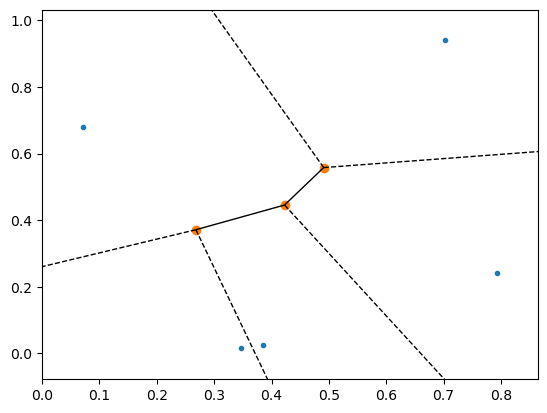

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi

# generate random points with weight
points = np.random.rand(5, 2)
weights = np.random.rand(5)

# calculate weighted voronoi tessellation
vor = Voronoi(points, qhull_options='Qbb Qc Qz')

# plot
fig = voronoi_plot_2d(vor)
plt.show()

[[ 0.91416353  0.37284378]
 [-0.07088181 -0.29195275]
 [ 0.25682186  0.93637944]
 [-0.34756375 -0.54195205]
 [ 0.43426208  0.1858544 ]
 [ 0.00937316  0.42671148]
 [ 0.54790231  0.34070715]
 [-0.18891622  0.77228663]
 [ 0.10980561 -0.06878837]
 [-0.73253435 -0.63161072]
 [ 0.71537312  0.22658265]
 [ 0.58574497 -0.1954769 ]
 [-0.70914294  0.52651789]
 [ 0.28236152 -0.01866218]
 [ 0.01548653 -0.77568532]
 [ 0.62795275 -0.01394212]
 [-0.98242997 -0.17481333]
 [-0.49673746 -0.6968372 ]
 [-0.42818263 -0.44774751]
 [-0.84232976  0.30343453]
 [ 0.06072708 -0.03804382]
 [-0.10465327 -0.1349439 ]
 [-0.28941682  0.47414381]
 [-0.40155542 -0.36280667]
 [-0.6129159  -0.50410528]
 [ 0.27273129  0.61549711]
 [-0.07979817 -0.66644976]
 [-0.49226645  0.1136566 ]
 [-0.70240562 -0.4715916 ]
 [ 0.05518211 -0.10124102]
 [ 0.51173121 -0.76677404]
 [ 0.60614942  0.11040868]]


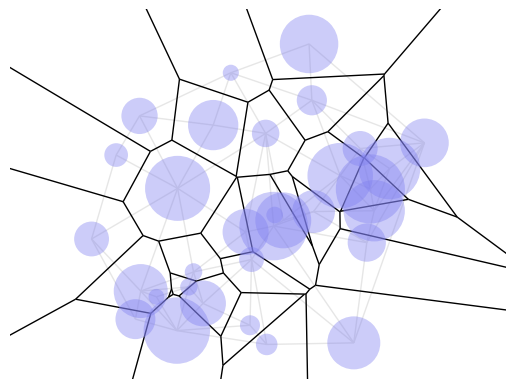

In [16]:
import itertools
import numpy
from scipy.spatial import ConvexHull

from matplotlib.collections import LineCollection
from matplotlib import pyplot as plot



# --- Misc. geometry code -----------------------------------------------------

'''
Pick N points uniformly from the unit disc
This sampling algorithm does not use rejection sampling.
'''
def disc_uniform_pick(N):
	angle = (2 * numpy.pi) * numpy.random.random(N)
	out = numpy.stack([numpy.cos(angle), numpy.sin(angle)], axis = 1)
	out *= numpy.sqrt(numpy.random.random(N))[:,None] 
	print(out)
	return out



def norm2(X):
	return numpy.sqrt(numpy.sum(X ** 2))



def normalized(X):
	return X / norm2(X)



# --- Delaunay triangulation --------------------------------------------------

def get_triangle_normal(A, B, C):
	return normalized(numpy.cross(A, B) + numpy.cross(B, C) + numpy.cross(C, A))



def get_power_circumcenter(A, B, C):
	N = get_triangle_normal(A, B, C)
	return (-.5 / N[2]) * N[:2]



def is_ccw_triangle(A, B, C):
	M = numpy.concatenate([numpy.stack([A, B, C]), numpy.ones((3, 1))], axis = 1)
	return numpy.linalg.det(M) > 0



def get_power_triangulation(S, R):
	# Compute the lifted weighted points
	S_norm = numpy.sum(S ** 2, axis = 1) - R ** 2
	S_lifted = numpy.concatenate([S, S_norm[:,None]], axis = 1)

	# Special case for 3 points
	if S.shape[0] == 3:
		if is_ccw_triangle(S[0], S[1], S[2]):
			return [[0, 1, 2]], numpy.array([get_power_circumcenter(*S_lifted)])
		else:
			return [[0, 2, 1]], numpy.array([get_power_circumcenter(*S_lifted)])

	# Compute the convex hull of the lifted weighted points
	hull = ConvexHull(S_lifted)
	
	# Extract the Delaunay triangulation from the lower hull
	tri_list = tuple([a, b, c] if is_ccw_triangle(S[a], S[b], S[c]) else [a, c, b]  for (a, b, c), eq in zip(hull.simplices, hull.equations) if eq[2] <= 0)
	
	# Compute the Voronoi points
	V = numpy.array([get_power_circumcenter(*S_lifted[tri]) for tri in tri_list])

	# Job done
	return tri_list, V



# --- Compute Voronoi cells ---------------------------------------------------

'''
Compute the segments and half-lines that delimits each Voronoi cell
  * The segments are oriented so that they are in CCW order
  * Each cell is a list of (i, j), (A, U, tmin, tmax) where
     * i, j are the indices of two ends of the segment. Segments end points are
       the circumcenters. If i or j is set to None, then it's an infinite end
     * A is the origin of the segment
     * U is the direction of the segment, as a unit vector
     * tmin is the parameter for the left end of the segment. Can be -1, for minus infinity
     * tmax is the parameter for the right end of the segment. Can be -1, for infinity
     * Therefore, the endpoints are [A + tmin * U, A + tmax * U]
'''
def get_voronoi_cells(S, V, tri_list):
	# Keep track of which circles are included in the triangulation
	vertices_set = frozenset(itertools.chain(*tri_list))

	# Keep track of which edge separate which triangles
	edge_map = { }
	for i, tri in enumerate(tri_list):
		for edge in itertools.combinations(tri, 2):
			edge = tuple(sorted(edge))
			if edge in edge_map:
				edge_map[edge].append(i)
			else:
				edge_map[edge] = [i]

	# For each triangle
	voronoi_cell_map = { i : [] for i in vertices_set }

	for i, (a, b, c) in enumerate(tri_list):
		# For each edge of the triangle
		for u, v, w in ((a, b, c), (b, c, a), (c, a, b)):
		# Finite Voronoi edge
			edge = tuple(sorted((u, v)))
			if len(edge_map[edge]) == 2:
				j, k = edge_map[edge]
				if k == i:
					j, k = k, j
				
				# Compute the segment parameters
				U = V[k] - V[j]
				U_norm = norm2(U)				

				# Add the segment
				voronoi_cell_map[u].append(((j, k), (V[j], U / U_norm, 0, U_norm)))
			else: 
			# Infinite Voronoi edge
				# Compute the segment parameters
				A, B, C, D = S[u], S[v], S[w], V[i]
				U = normalized(B - A)
				I = A + numpy.dot(D - A, U) * U
				W = normalized(I - D)
				if numpy.dot(W, I - C) < 0:
					W = -W	
			
				# Add the segment
				voronoi_cell_map[u].append(((edge_map[edge][0], -1), (D,  W, 0, None)))				
				voronoi_cell_map[v].append(((-1, edge_map[edge][0]), (D, -W, None, 0)))				

	# Order the segments
	def order_segment_list(segment_list):
		# Pick the first element
		first = min((seg[0][0], i) for i, seg in enumerate(segment_list))[1]

		# In-place ordering
		segment_list[0], segment_list[first] = segment_list[first], segment_list[0]
		for i in range(len(segment_list) - 1):
			for j in range(i + 1, len(segment_list)):
				if segment_list[i][0][1] == segment_list[j][0][0]:
					segment_list[i+1], segment_list[j] = segment_list[j], segment_list[i+1]
					break

		# Job done
		return segment_list

	# Job done
	return { i : order_segment_list(segment_list) for i, segment_list in voronoi_cell_map.items() }



# --- Plot all the things -----------------------------------------------------

def display(S, R, tri_list, voronoi_cell_map):
	# Setup
	fig, ax = plot.subplots()
	plot.axis('equal')
	plot.axis('off')	

	# Set min/max display size, as Matplotlib does it wrong
	min_corner = numpy.amin(S, axis = 0) - numpy.max(R)
	max_corner = numpy.amax(S, axis = 0) + numpy.max(R)
	plot.xlim((min_corner[0], max_corner[0]))
	plot.ylim((min_corner[1], max_corner[1]))

	# Plot the samples
	for Si, Ri in zip(S, R):
		ax.add_artist(plot.Circle(Si, Ri, fill = True, alpha = .4, lw = 0., color = '#8080f0', zorder = 1))

	# Plot the power triangulation
	edge_set = frozenset(tuple(sorted(edge)) for tri in tri_list for edge in itertools.combinations(tri, 2))
	line_list = LineCollection([(S[i], S[j]) for i, j in edge_set], lw = 1., colors = '.9')
	line_list.set_zorder(0)
	ax.add_collection(line_list)

	# Plot the Voronoi cells
	edge_map = { }
	for segment_list in voronoi_cell_map.values():
		for edge, (A, U, tmin, tmax) in segment_list:
			edge = tuple(sorted(edge))
			if edge not in edge_map:
				if tmax is None:
					tmax = 10
				if tmin is None:
					tmin = -10

				edge_map[edge] = (A + tmin * U, A + tmax * U)

	line_list = LineCollection(edge_map.values(), lw = 1., colors = 'k')
	line_list.set_zorder(0)
	ax.add_collection(line_list)

	# Job done
	plot.show()

  

# --- Main entry point --------------------------------------------------------

def main():
	# Generate samples, S contains circles center, R contains circles radius
	sample_count = 32
	S = 5 * disc_uniform_pick(sample_count)
	R = .8 * numpy.random.random(sample_count) + .2

	# Compute the power triangulation of the circles
	tri_list, V = get_power_triangulation(S, R)

	# Compute the Voronoi cells
	voronoi_cell_map = get_voronoi_cells(S, V, tri_list)

	# Display the result
	display(S, R, tri_list, voronoi_cell_map)



if __name__ == '__main__':
	main()